['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10 

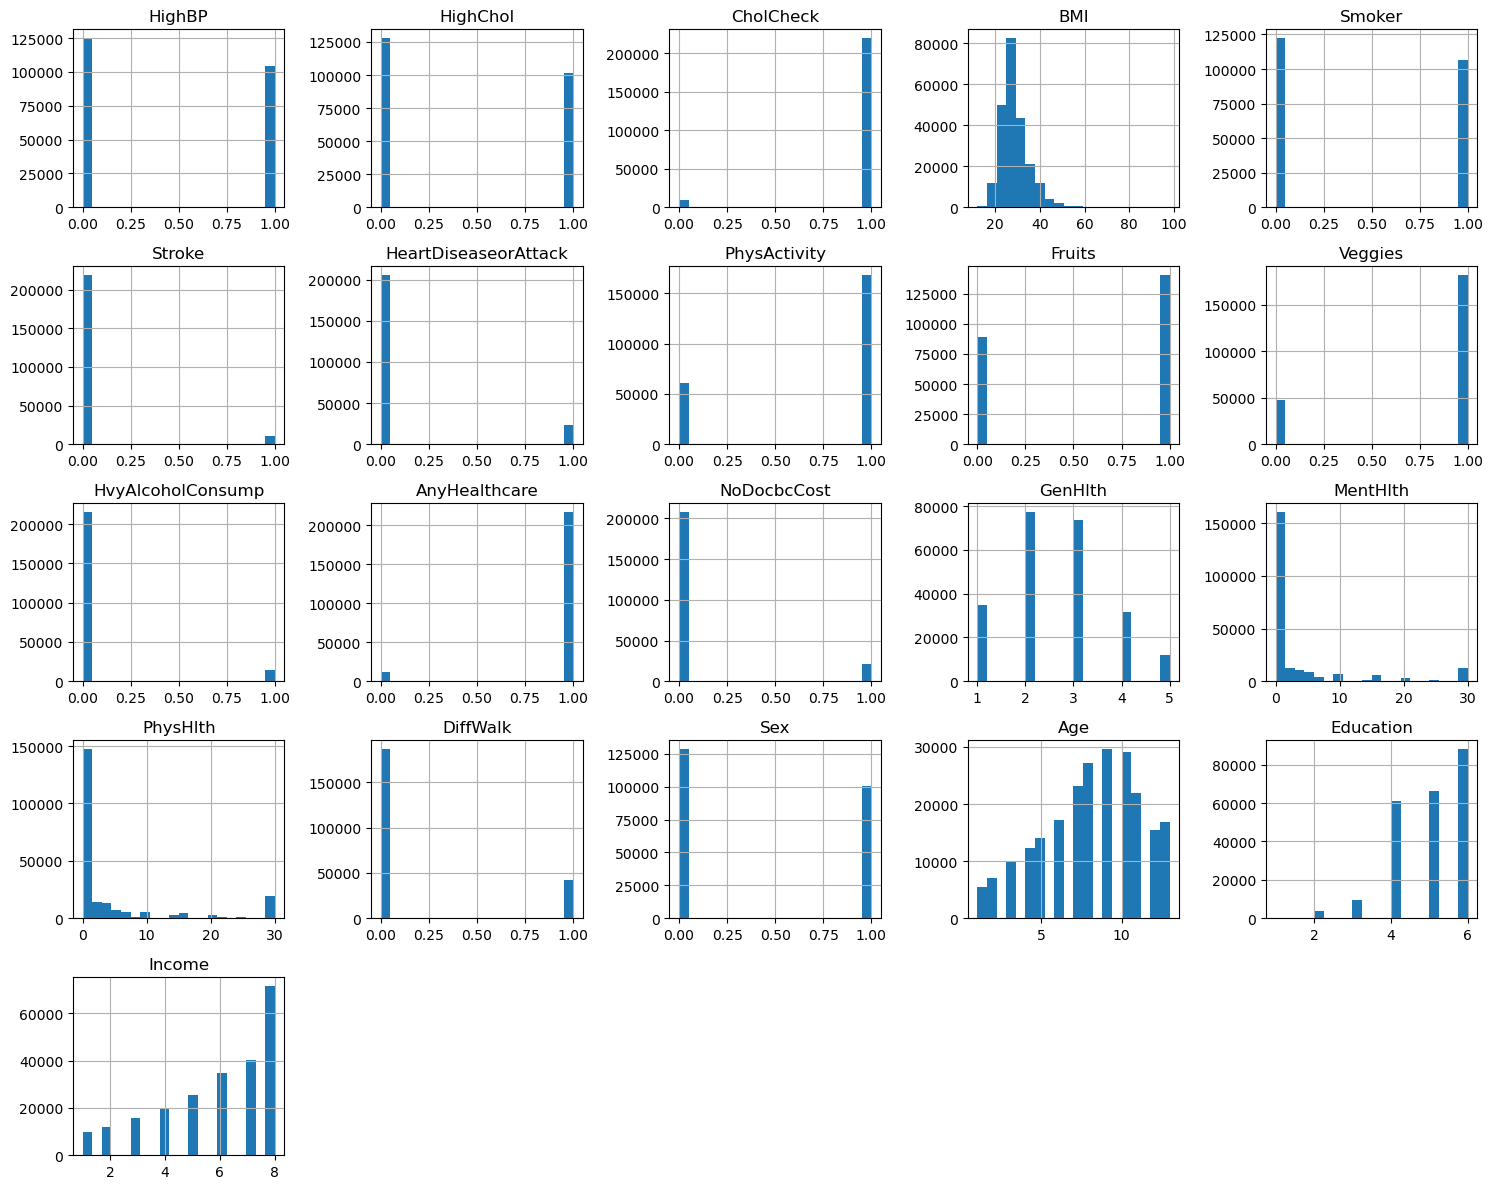

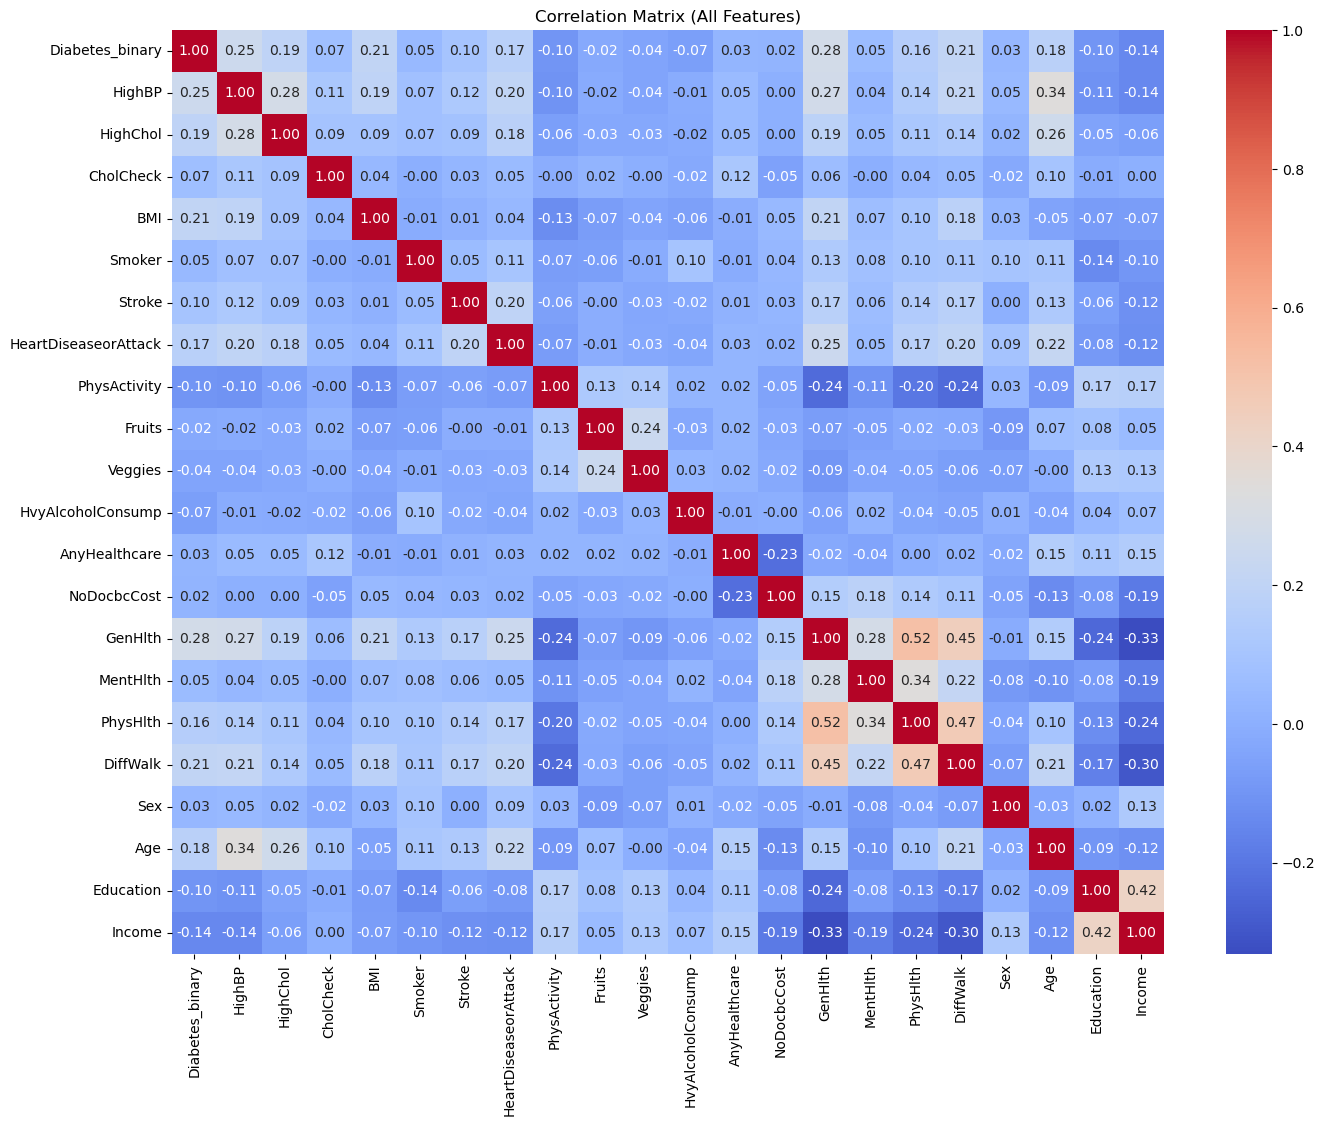

Correlation with Diabetes_binary:

GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Stroke                  0.099193
CholCheck               0.072523
MentHlth                0.054153
Smoker                  0.045504
Sex                     0.032724
AnyHealthcare           0.025331
NoDocbcCost             0.020048
Fruits                 -0.024805
Veggies                -0.041734
HvyAlcoholConsump      -0.065950
PhysActivity           -0.100404
Education              -0.102686
Income                 -0.140659
Name: Diabetes_binary, dtype: float64
GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
Phy

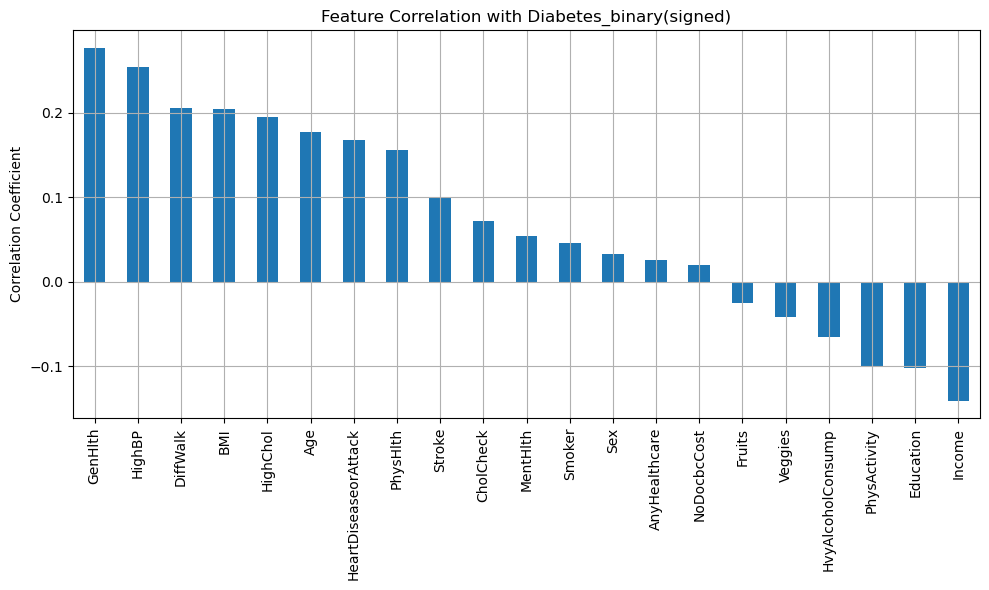

C:\Users\mdnaj\AppData\Local\Temp\ipykernel_1084\1391096174.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=t_cor.values, y=t_cor.index, palette='coolwarm')


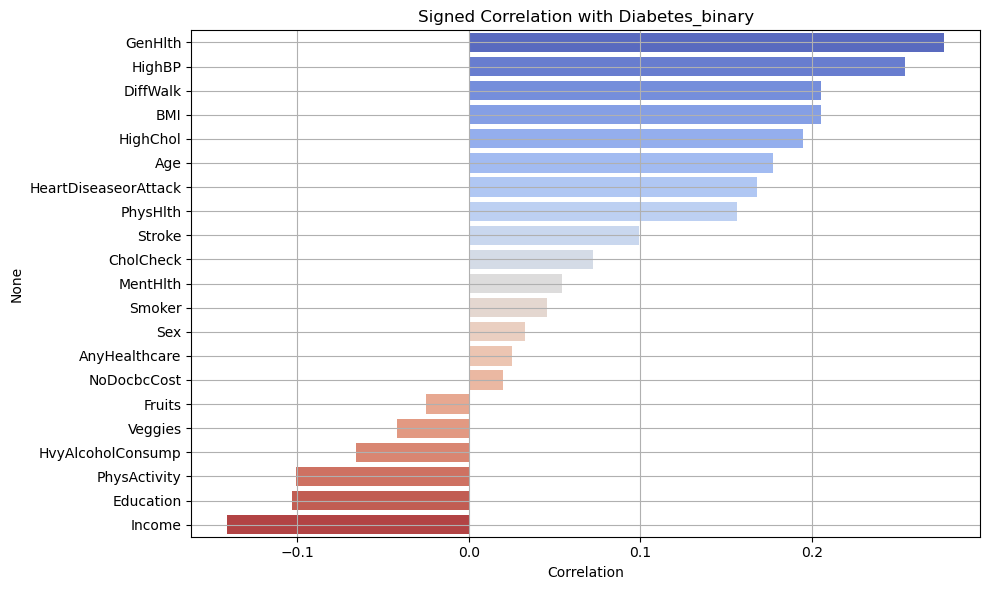

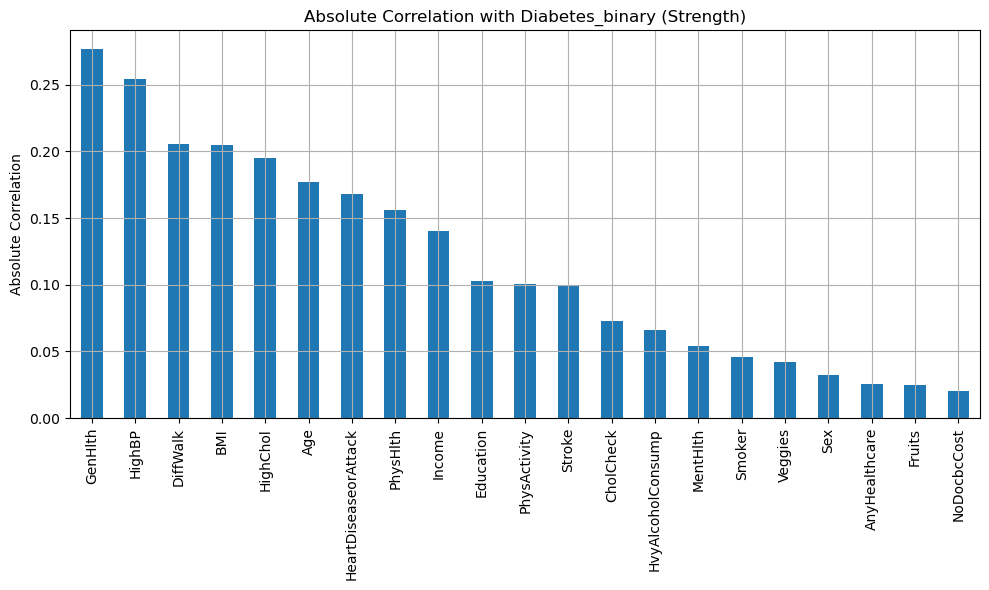

C:\Users\mdnaj\AppData\Local\Temp\ipykernel_1084\1391096174.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_abs.values, y=corr_abs.index, palette='Blues_r')


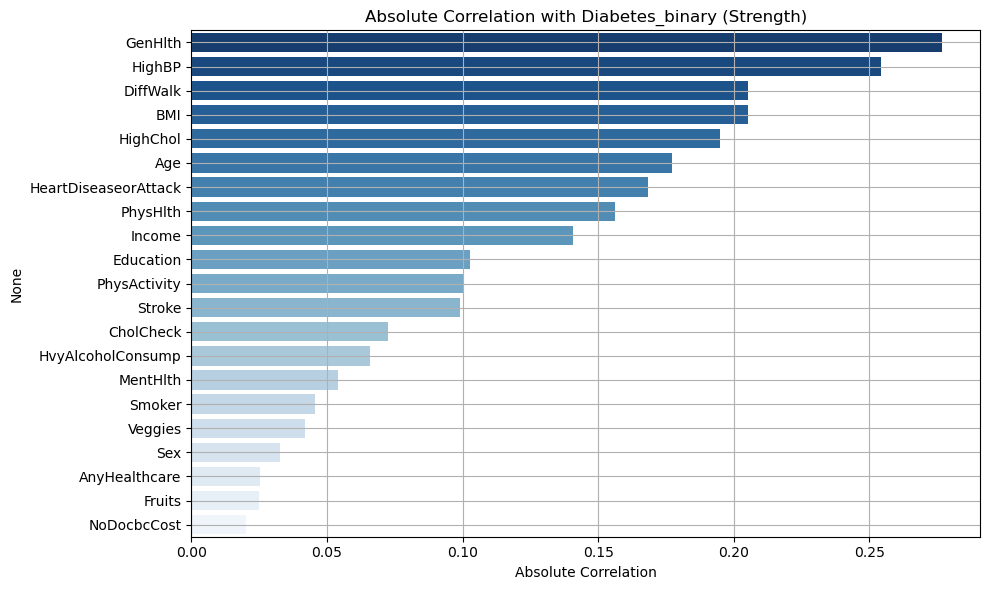

                 Feature       VIF
13               GenHlth  1.716096
15              PhysHlth  1.594297
16              DiffWalk  1.511628
20                Income  1.430313
18                   Age  1.353317
0                 HighBP  1.301200
19             Education  1.272080
14              MentHlth  1.221587
6   HeartDiseaseorAttack  1.167062
1               HighChol  1.158112
12           NoDocbcCost  1.135647
7           PhysActivity  1.130509
3                    BMI  1.121050
11         AnyHealthcare  1.109839
9                Veggies  1.098133
8                 Fruits  1.097947
5                 Stroke  1.077470
4                 Smoker  1.076032
17                   Sex  1.075743
2              CholCheck  1.035274
10     HvyAlcoholConsump  1.026354


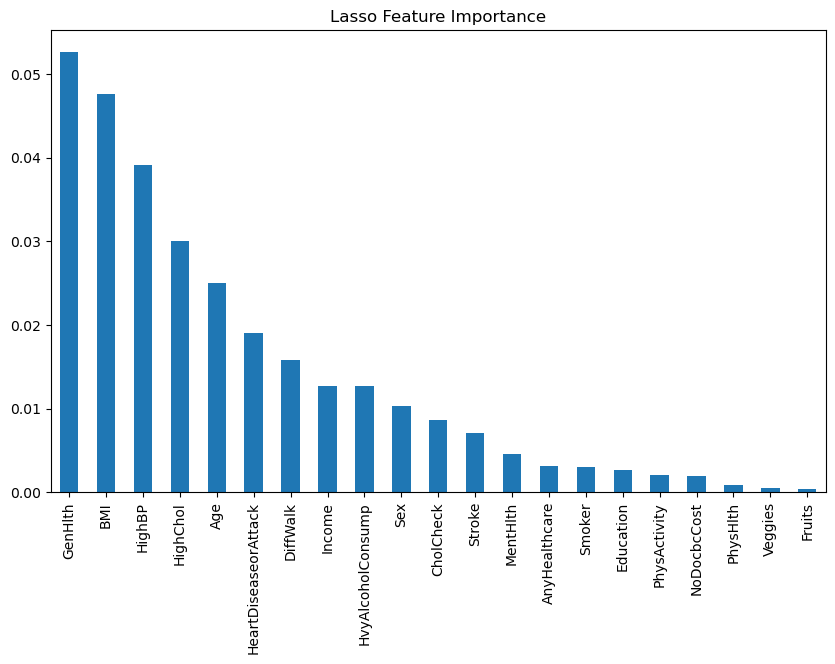

Top Features from RFE: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'Sex', 'Age', 'Income']


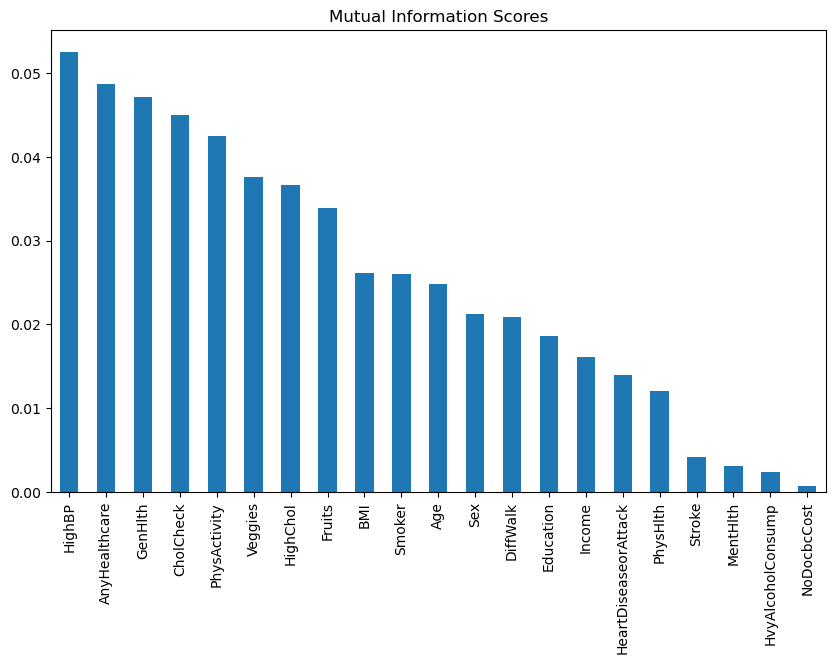


Combined Feature Rankings:
                      LassoRank  MIRank  RFERank  AverageRank
GenHlth                     1.0     3.0      4.0         2.67
HighBP                      3.0     1.0     10.0         4.67
BMI                         2.0     9.0      7.0         6.00
Age                         5.0    11.0      2.0         6.00
HighChol                    4.0     7.0      9.0         6.67
CholCheck                  11.0     4.0      8.0         7.67
Income                      8.0    15.0      1.0         8.00
Sex                        10.0    12.0      3.0         8.33
HeartDiseaseorAttack        6.0    16.0      6.0         9.33
HvyAlcoholConsump           9.0    20.0      5.0        11.33
AnyHealthcare              14.0     2.0     22.0        12.67
DiffWalk                    7.0    13.0     22.0        14.00
PhysActivity               17.0     5.0     22.0        14.67
Smoker                     15.0    10.0     22.0        15.67
Veggies                    20.0     6.0   

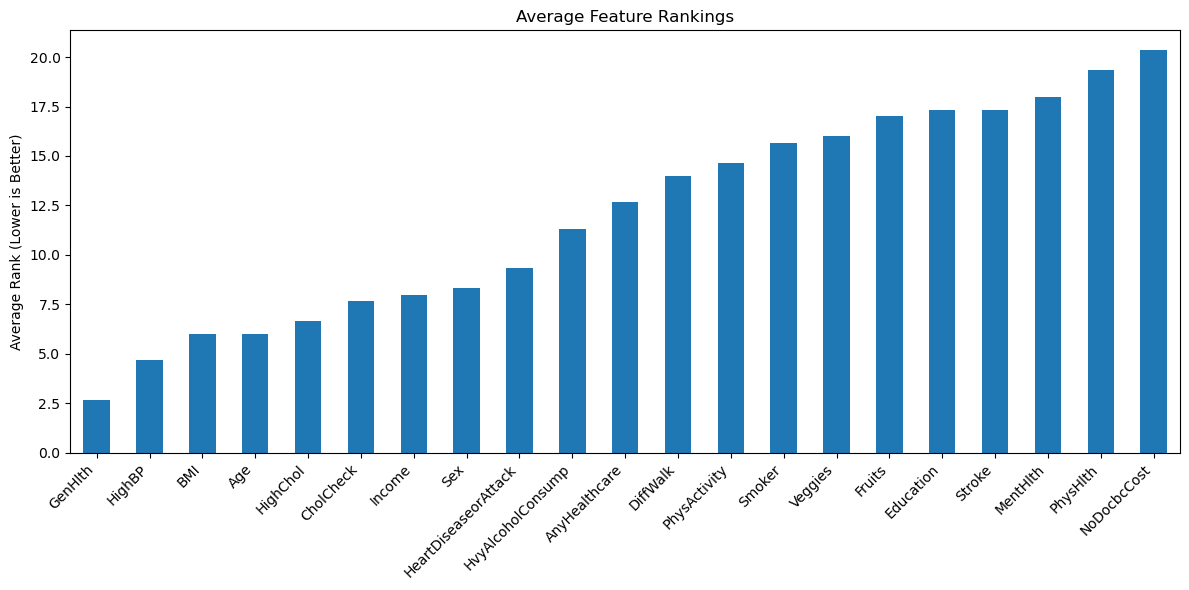

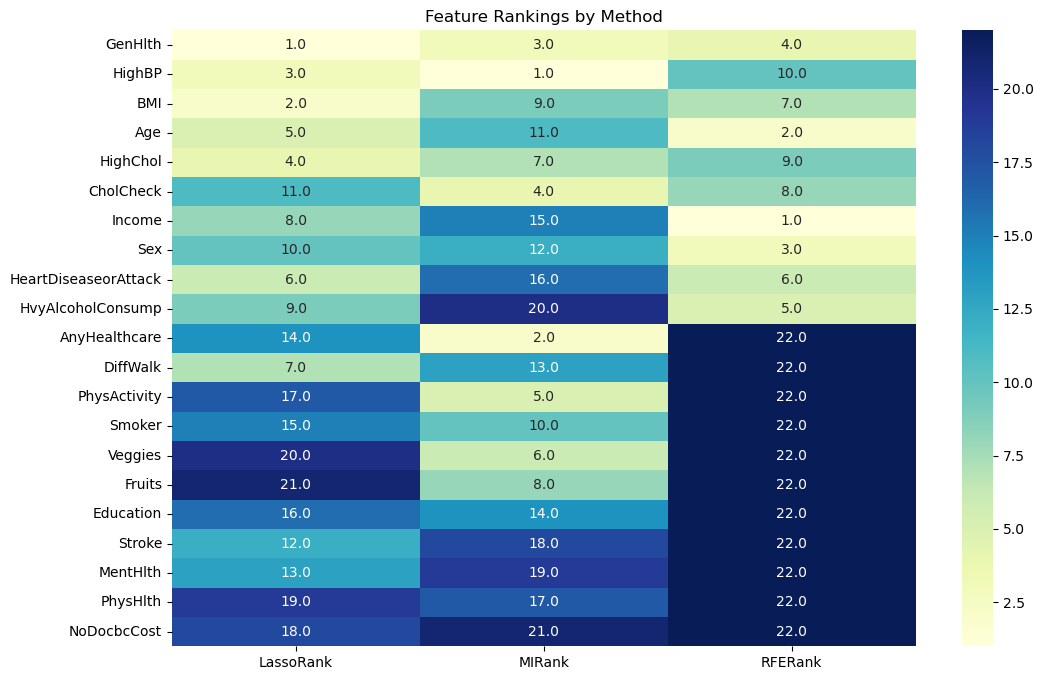

Original class distribution:
Diabetes_binary
0.0    194377
1.0     35097
Name: count, dtype: int64


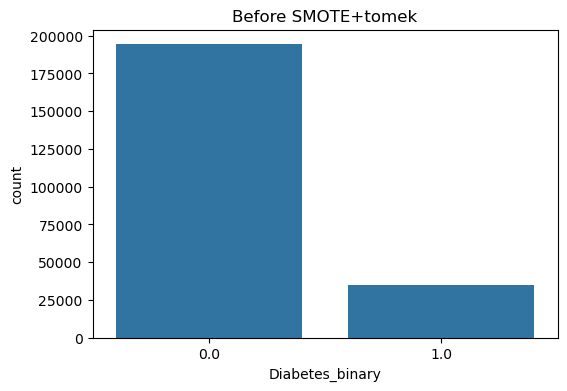

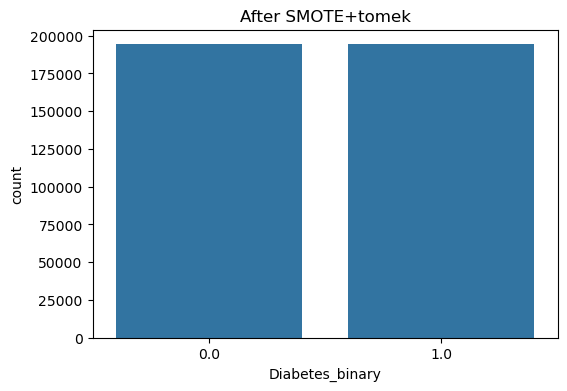

Diabetes_binary
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


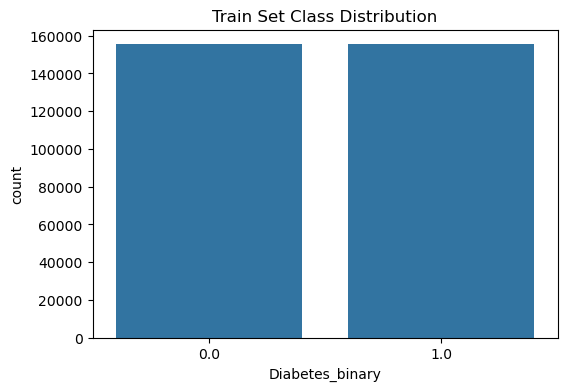

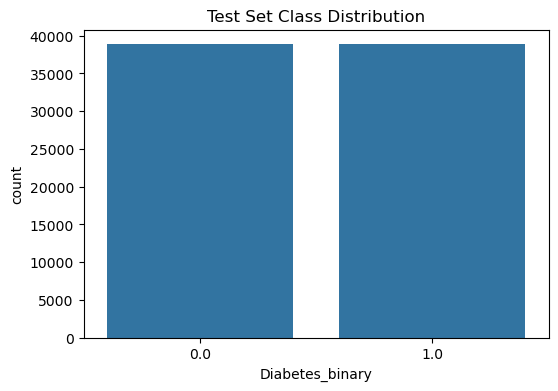

Train set:
 Diabetes_binary
1.0    0.500002
0.0    0.499998
Name: proportion, dtype: float64

Test set:
 Diabetes_binary
0.0    0.500006
1.0    0.499994
Name: proportion, dtype: float64
Train set count:
 Diabetes_binary
1.0    155469
0.0    155468
Name: count, dtype: int64

Test set count:
 Diabetes_binary
0.0    38868
1.0    38867
Name: count, dtype: int64


In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()
# Step 1: Data Preprocessing
# Check for nulls and data types
missing_values = df.isnull().sum()
missing_values
d_types = df.dtypes
d_types
#Check duplicate rows
duplicate_c = df.duplicated().sum()
duplicate_c 
df
feature_names = df.drop("Diabetes_binary", axis=1).columns.tolist()
print(feature_names)
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]
X.head()
df.info()
#duplicates value remove
df = df.drop_duplicates()
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]
X,y
#Check duplicate rows again
duplicate_c = df.duplicated().sum()
duplicate_c
y.value_counts(normalize=True)
#See features have <1% variance
low_variance = (X.nunique() / len(X)) < 0.01
print(X.columns[low_variance]) 
#step2: feature analysis
import seaborn as sns
#histograms
X.hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()
#Correlation Matrix(all features)
plt.figure(figsize=(16, 12))
c_matrix = df.corr(numeric_only=True)
sns.heatmap(c_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (All Features)")
plt.show()
#Correlation with Target
t_cor = c_matrix["Diabetes_binary"].drop("Diabetes_binary").sort_values(ascending=False)
print("Correlation with Diabetes_binary:\n")
print(t_cor)
#corr_abs t_cor = c_matrix["Diabetes_binary"].drop("Diabetes_binary").abs().sort_values(ascending=False)
corr_abs =t_cor.abs().sort_values(ascending=False)
#top correlated features
print(corr_abs)
#Visual correlations with target signed
plt.figure(figsize=(10, 6))
t_cor.plot(kind='bar')
plt.title("Feature Correlation with Diabetes_binary(signed)")
plt.ylabel("Correlation Coefficient")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x=t_cor.values, y=t_cor.index, palette='coolwarm')
plt.title("Signed Correlation with Diabetes_binary")
plt.xlabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()
#Visual absolute correlations
plt.figure(figsize=(10, 6))
corr_abs.plot(kind='bar')
plt.title("Absolute Correlation with Diabetes_binary (Strength)")
plt.ylabel("Absolute Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()
#Visual absolute correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_abs.values, y=corr_abs.index, palette='Blues_r')
plt.title("Absolute Correlation with Diabetes_binary (Strength)")
plt.xlabel("Absolute Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()
#Multicollinearity Check(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_const = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]  # i+1 because of const
print(vif_data.sort_values("VIF", ascending=False))
#Feature Importance Using Lasso Regression(Selection)
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X_scaled, y)

feature_importance = pd.Series(np.abs(lasso.coef_), index=X.columns)
feature_importance = feature_importance[feature_importance > 0]
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,6), title="Lasso Feature Importance")
plt.show()
#Recursive Feature Elimination (RFE) with Logistic
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_scaled, y)

selected_features = X.columns[rfe.support_]
print("Top Features from RFE:", selected_features.tolist())
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
mi_series.plot(kind='bar', figsize=(10,6), title='Mutual Information Scores')
plt.show()
#Combine Feature Rankings

import pandas as pd

#Convert RFE feature list into ranking (1 = most important)
rfe_ranks = pd.Series(
    data=[len(selected_features) - i for i in range(len(selected_features))],
    index=selected_features,
    name='RFERank'
)
#Normalize Lasso & MI into Rankings
lasso_rank = feature_importance.abs().rank(ascending=False).rename('LassoRank')
mi_rank = mi_series.rank(ascending=False).rename('MIRank')
#Combine All Rankings into One DataFrame

feature_rank_df = pd.concat([lasso_rank, mi_rank, rfe_ranks], axis=1)

#Fill missing RFE ranks with worst rank(total number of features + 1)
feature_rank_df['RFERank'] = feature_rank_df['RFERank'].fillna(len(feature_rank_df) + 1)

#Compute Average Ranking
feature_rank_df['AverageRank'] = feature_rank_df[['LassoRank', 'MIRank', 'RFERank']].mean(axis=1)

#Sort by Average Ranking
combined_rank = feature_rank_df.sort_values(by='AverageRank')

print("\nCombined Feature Rankings:")
print(combined_rank.round(2))
#Bar plot of average ranks
combined_rank['AverageRank'].plot(kind='bar', figsize=(12,6), title='Average Feature Rankings')
plt.ylabel('Average Rank (Lower is Better)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
ordered_df = combined_rank.sort_values('AverageRank')

#Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ordered_df[['LassoRank', 'MIRank', 'RFERank']], annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Feature Rankings by Method")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

#menually drop low imapacted feature
top_features = combined_rank.head(10).index.tolist()
X_selected = X[top_features]
X_selected
#Step 3: Balancing the Data using SMOTE
#before going to next step check it
print("Original class distribution:")
print(y.value_counts())
#start step3 from here, with SMOTE
#from imblearn.over_sampling import SMOTE
#smote = SMOTE(random_state=42)

#for x_selected
#X_resampled, y_resampled = smote.fit_resample(X_selected, y)
#X_resampled, y_resampled = smote.fit_resample(X, y)
# Before SMOTE
#plt.figure(figsize=(6,4))
#sns.countplot(x=y)
#plt.title("Before SMOTE")
#plt.show()

# After SMOTE
#plt.figure(figsize=(6,4))
#sns.countplot(x=y_resampled)
#plt.title("After SMOTE")
#plt.show()
#print(y_resampled.value_counts(normalize=True))
#step4: Train / Test split

# Use SMOTE + Tomek Links balanced data
#SMOTE + Tomek Links
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_bal, y_bal = smote_tomek.fit_resample(X_selected, y)
# Before SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Before SMOTE+tomek")
plt.show()

# After SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_bal)
plt.title("After SMOTE+tomek")
plt.show()
print(y_bal.value_counts(normalize=True))
#step4: Train / Test split
X_final = X_bal
y_final = y_bal
#train test, for testing it will be 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, 
    test_size=0.2, 
    random_state=42,
    stratify=y_final
)
# Training set distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title("Train Set Class Distribution")
plt.show()

# Testing set distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test)
plt.title("Test Set Class Distribution")
plt.show()
print("Train set:\n", y_train.value_counts(normalize=True))
print("\nTest set:\n", y_test.value_counts(normalize=True))
print("Train set count:\n", y_train.value_counts())
print("\nTest set count:\n", y_test.value_counts())


In [190]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Define tuned models
rf = RandomForestClassifier(
    bootstrap=False,
    max_depth=25,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=15,
    n_estimators=700,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

xgb = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=9,
    n_estimators=550,
    subsample=0.55,
    random_state=42,
    scale_pos_weight=1,
    eval_metric='logloss',
    n_jobs=-1
)

cat = CatBoostClassifier(
    iterations=600,
    learning_rate=0.1,
    depth=8,
    loss_function='Logloss',
    eval_metric='AUC',
    random_state=42,
    verbose=0,
    class_weights=[1, 1.2]
)





In [191]:
# 2. Stacking ensemble
stack = StackingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('cat', cat)],
    final_estimator=LogisticRegression(max_iter=200),
    cv=3,
    n_jobs=-1
)

models = {
    "RandomForest": rf,
    "XGBoost": xgb,
    "CatBoost": cat,
    "Stacking": stack
}

results = {}


In [192]:
# 3. Train & evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred, output_dict=True)

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)  # Recall for class 1
    specificity = tn / (tn + fp)  # Recall for class 0

    results[name] = {
        "ROC-AUC": auc,
        "Precision": report['1.0']['precision'],
        "Recall": report['1.0']['recall'],
        "F1-score": report['1.0']['f1-score'],
        "Sensitivity": sensitivity,
        "Specificity": specificity
    }


In [193]:
# 4. Convert to DataFrame for comparison
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

               ROC-AUC  Precision    Recall  F1-score  Sensitivity  \
RandomForest  0.945271   0.860191  0.882831  0.871364     0.882831   
XGBoost       0.943763   0.880940  0.842772  0.861433     0.842772   
CatBoost      0.947609   0.874882  0.860319  0.867539     0.860319   
Stacking      0.952050   0.876970  0.872051  0.874503     0.872051   

              Specificity  
RandomForest     0.856514  
XGBoost          0.886102  
CatBoost         0.876968  
Stacking         0.877663  


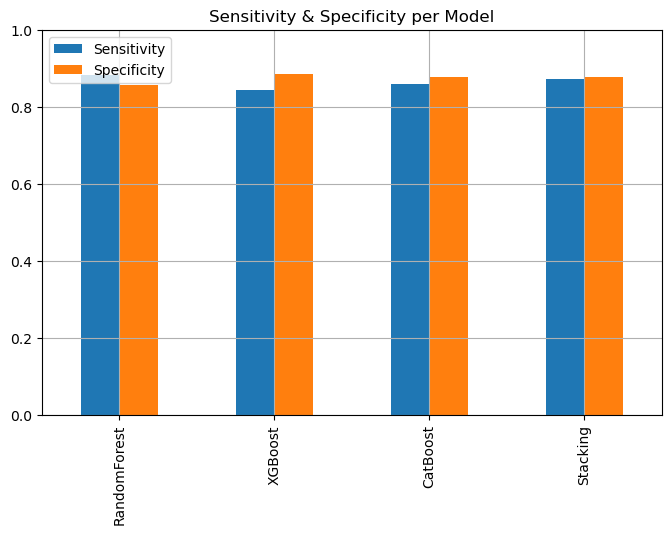

In [194]:
# 5. Plot Sensitivity & Specificity
results_df[['Sensitivity', 'Specificity']].plot(kind='bar', figsize=(8,5))
plt.title("Sensitivity & Specificity per Model")
plt.ylim(0, 1)
plt.grid(True)
plt.show()


In [195]:
# 6. Threshold tuning for stacking (maximize recall)
y_scores = models['Stacking'].predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

In [196]:
print(y_scores)

[0.97179081 0.03409804 0.95866998 ... 0.25365436 0.95645738 0.19979831]


In [237]:
# Pick threshold with recall >= 0.90 and best precision
target_recall = 0.90
idx = np.argmax((recalls >= target_recall) & (precisions >= 0.80))
best_threshold = thresholds[idx]
print(f"Best Threshold for recall >= {target_recall}: {best_threshold:.2f}")


Best Threshold for recall >= 0.9: 0.22


In [239]:
# Apply new threshold
y_pred_thresh = (y_scores >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

         0.0       0.92      0.77      0.84     38868
         1.0       0.80      0.94      0.86     38867

    accuracy                           0.85     77735
   macro avg       0.86      0.85      0.85     77735
weighted avg       0.86      0.85      0.85     77735



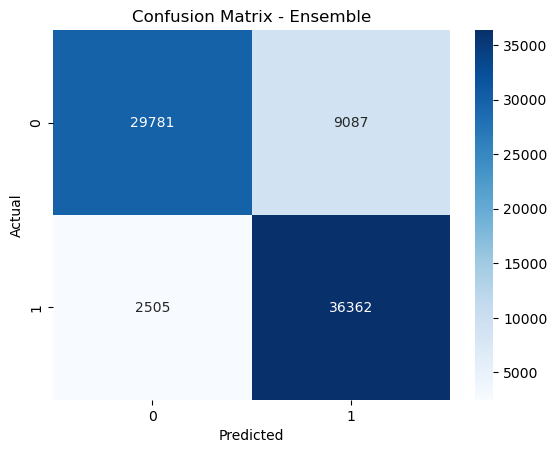

In [241]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_thresh)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Ensemble")
plt.show()

In [ ]:
#final trainign model
stack.fit(X_train, y_train)

#Predict with tuned threshold
y_scores = stack.predict_proba(X_test)[:, 1]
y_pred = (y_scores >= 0.22).astype(int)


In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Ensemble")
plt.show()